# Visualização de dados.
Exemplos de código para visualização de dados com PySpark e Seaborn. O uso do PySpark é recomendado quando temos que trabalhar com Big Data, ou seja, grande quantidade de dados que não cabem na memória principal de um computador comum. Este framework normalmente vem embarcado em ambientes de computação distribuída como o Databricks. Tais ambientes normalmente possuem ferramentas nativas para visualização de dados. Por isso, é altamente recomendado o uso dessas ferramentas, como: [Databricks data visualization](https://docs.databricks.com/en/visualizations/index.html)

Nos exemplos abaixo eu USO uma técnica alternativa de amostragem de dados de forma que estes caibam na memória principal. Assim é possível fazer gráficos da maneira mais tradicional utilizando o Seaborn. A grande desvantagem desta técnica é que há perda de informação, e ela é inversamente proporcional ao tamanho da amostra. Por isso não podemos confiar muito nos gráficos criados.

In [ ]:
%pip install ipython-autotime
%pip install pyspark

time: 11.6 s (started: 2023-09-30 17:00:51 +00:00)


# Imports iniciais.

In [ ]:
from google.colab          import drive, files
from pyspark.sql           import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types     import *

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 954 µs (started: 2023-09-30 17:01:02 +00:00)


# Início da sessão.

In [ ]:
drive.mount('/content/drive', force_remount=True)
spark = SparkSession.builder.master('local').appName('pyspark_app').getOrCreate()
spark

Mounted at /content/drive


time: 4.37 s (started: 2023-09-30 17:01:02 +00:00)


# Leitura de arquivos.

In [ ]:
houses = spark.read.csv("/content/drive/MyDrive/datasets/housing/housing.csv", header=True, inferSchema=True, encoding='utf-8')
print(f'shape={houses.count(), len(houses.columns)}')
houses.show(5)

shape=(20640, 10)
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37

# Visualização de dados com Seaborn.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

time: 4.1 ms (started: 2023-09-30 17:01:08 +00:00)


# Amostragem de dados.
Após a amostragem, podemos utilizar duas técnicas para a visualização:
1.   Utilizando a função collect()
2.   Transformando a amostra em um dataframe do Pandas.



In [ ]:
sample = houses.sample(fraction=0.1)

time: 8.47 ms (started: 2023-09-30 17:01:08 +00:00)


## collect()
Quando utilizada com a função select() podemos obter uma lista de valores que pode ser atribuída a um dos eixos do gráfico.

In [ ]:
result = sample.select('longitude').collect()
axis_x = [row[0] for row in result]

result = sample.select('latitude').collect()
axis_y = [row[0] for row in result]

time: 1.01 s (started: 2023-09-30 17:01:08 +00:00)


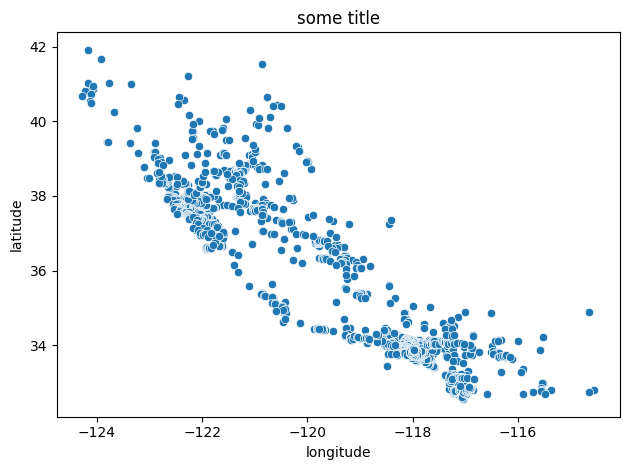

time: 409 ms (started: 2023-09-30 17:01:09 +00:00)


In [ ]:
axis = sns.scatterplot(x=axis_x, y=axis_y)
axis.set(xlabel ="longitude", ylabel = "latitude", title ='some title')
plt.tight_layout()
plt.show()

## toPandas()

In [ ]:
pd_sample = sample.toPandas()
print(type(pd_sample))
pd_sample.head()

<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
1,-122.28,37.82,52.0,1238.0,288.0,622.0,259.0,1.5057,87500.0,NEAR BAY
2,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY
3,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
4,-122.28,37.80,52.0,96.0,31.0,191.0,34.0,0.7500,162500.0,NEAR BAY


time: 444 ms (started: 2023-09-30 17:01:09 +00:00)


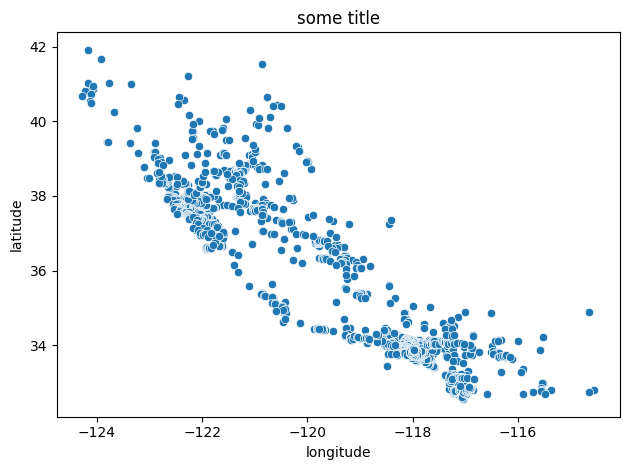

time: 371 ms (started: 2023-09-30 17:01:10 +00:00)


In [ ]:
axis = sns.scatterplot(x=pd_sample['longitude'], y=pd_sample['latitude'])
axis.set(xlabel ="longitude", ylabel = "latitude", title ='some title')
plt.tight_layout()
plt.show()